In [2]:
import json
from datetime import datetime


# Notebook for Shift with Chenran

Shift on  28 and 29 September 2022 for testing Bayesian Optimisation (BO) against Reinforcement Learning (RL).

Once we know BO is working in the machine, the plan is to test BO and RL in pairs on the same problems (targets) and compare their performance in the real world.

In [2]:
# Define target (and thresholds) ... max steps is chosen seperately for each algorithm
comment = "test"

target_mu_x = 0.0
target_sigma_x = 0.0
target_mu_y = 0.0
target_sigma_y = 0.0

target_mu_x_threshold = 3.3198e-6
target_mu_y_threshold = 3.3198e-6
target_sigma_x_threshold = 3.3198e-6
target_sigma_y_threshold = 3.3198e-6


In [5]:
# # Load problem
# problem_index = 0

# with open("problems.json", "r") as f:
#     problem = json.load(f)[problem_index]

# comment = f"problem_{problem_index:03d}"

# # Note that the indicies are still according to the old order mu_x, mu_y, sigma_x, sigma_y
# target_mu_x = problem["desired"][0]
# target_sigma_x = problem["desired"][2]
# target_mu_y = problem["desired"][1]
# target_sigma_y = problem["desired"][3]

# target_mu_x_threshold = 3.3198e-6
# target_mu_y_threshold = 3.3198e-6
# target_sigma_x_threshold = 3.3198e-6
# target_sigma_y_threshold = 3.3198e-6


initializing ocelot...


  0%|          | 0/10 [00:00<?, ?it/s]/Users/jankaiser/Documents/DESY/ares-ea-rl/ea_bo.py:165: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:204.)
  X = torch.cat([X, torch.tensor([new_action])])
11it [01:10,  6.37s/it]                        


title = 'Beam Optimisation on AREABSCR1 using Bayesian Optimisation'
msg = 'Bayesian Optimisation optimised beam on AREABSCR1\n\nAgent: Bayesian Optimisation\nStart time: 2022-09-27 23:12:50.378468\nTime taken: 0:01:10.056504\nNo. of steps: 11\n\nBeam before:\n    mu_x    = -1.2208 mm\n    sigma_x =  1.2055 mm\n    mu_y    =  0.1650 mm\n    sigma_y =  1.1509 mm\n\nBeam after:\n    mu_x    =  0.2058 mm\n    sigma_x =  0.0422 mm\n    mu_y    =  0.0700 mm\n    sigma_y =  0.1359 mm\n\nTarget beam:\n    mu_x    =  0.0000 mm    (e = 0.0033 mm) :/\n    sigma_x =  0.0000 mm    (e = 0.0033 mm) :/\n    mu_y    =  0.0000 mm    (e = 0.0033 mm) :/\n    sigma_y =  0.0000 mm    (e = 0.0033 mm) :/\n\nFinal magnet settings:\n    AREAMQZM1 strength =   8.2121 1/m^2\n    AREAMQZM2 strength = -13.8616 1/m^2\n    AREAMCVM1 kick     =  -0.5277 mrad\n    AREAMQZM3 strength =   6.8966 1/m^2\n    AREAMCHM1 kick     =   0.6466 mrad\n    '


/usr/bin/lp: No such file or directory


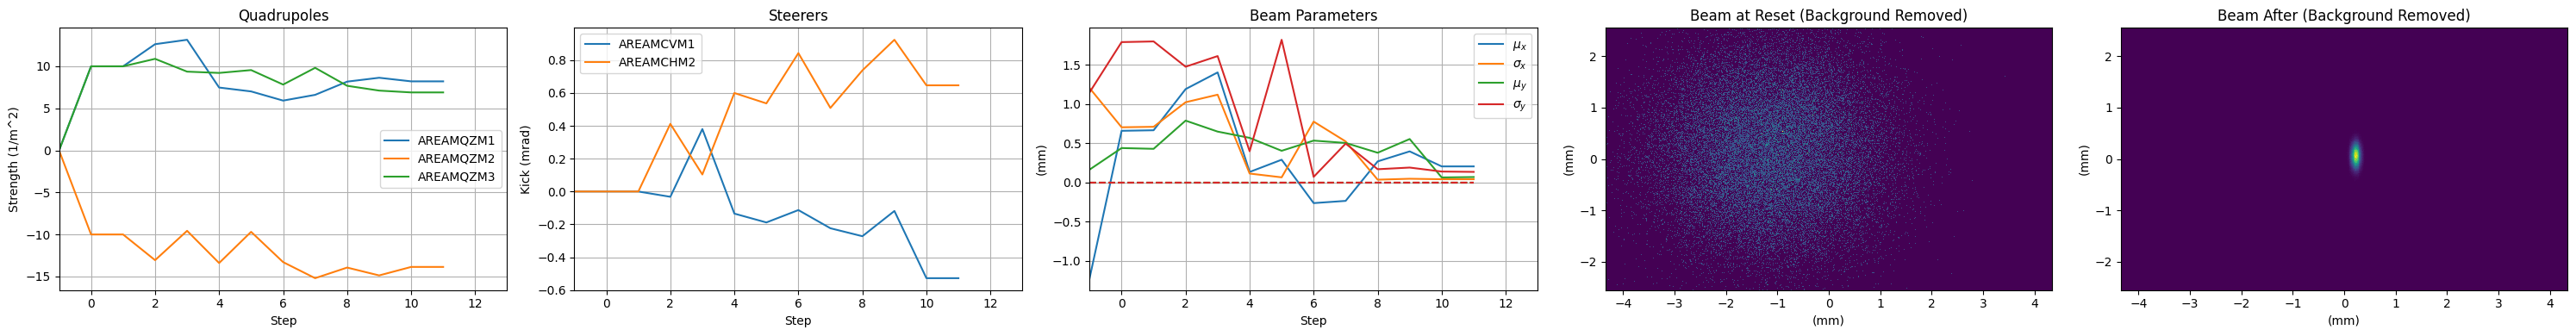

In [6]:
# Bayesian Optimisation
from ea_bo import optimize

optimize(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=10,
    model_name="Bayesian Optimisation",
    logbook=True,
    data_log_dir=f"kit_shift_data/bo/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
    obj_function="logmae",
    acquisition="EI",
    init_x=None,
    init_samples=5,
    filter_action=None,
)


/opt/homebrew/Caskroom/miniforge/base/envs/rl39/lib/python3.9/site-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
  warnings.warn(
100%|██████████| 10/10 [01:02<00:00,  6.26s/it]


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2022-09-27 23:14:10.840489\nTime taken: 0:01:02.597691\nNo. of steps: 10\n\nBeam before:\n    mu_x    =  0.2058 mm\n    sigma_x =  0.0422 mm\n    mu_y    =  0.0700 mm\n    sigma_y =  0.1359 mm\n\nBeam after:\n    mu_x    =  0.2413 mm\n    sigma_x =  0.1447 mm\n    mu_y    =  0.4401 mm\n    sigma_y =  0.3397 mm\n\nTarget beam:\n    mu_x    =  0.0000 mm    (e = 0.0033 mm) :/\n    sigma_x =  0.0000 mm    (e = 0.0033 mm) :/\n    mu_y    =  0.0000 mm    (e = 0.0033 mm) :/\n    sigma_y =  0.0000 mm    (e = 0.0033 mm) :/\n\nFinal magnet settings:\n    AREAMQZM1 strength =   3.5317 1/m^2\n    AREAMQZM2 strength = -12.4885 1/m^2\n    AREAMCVM1 kick     =  -0.3397 mrad\n    AREAMQZM3 strength =  16.5296 1/m^2\n    AREAMCHM1 kick     =   0.8822 mrad\n    '


/usr/bin/lp: No such file or directory


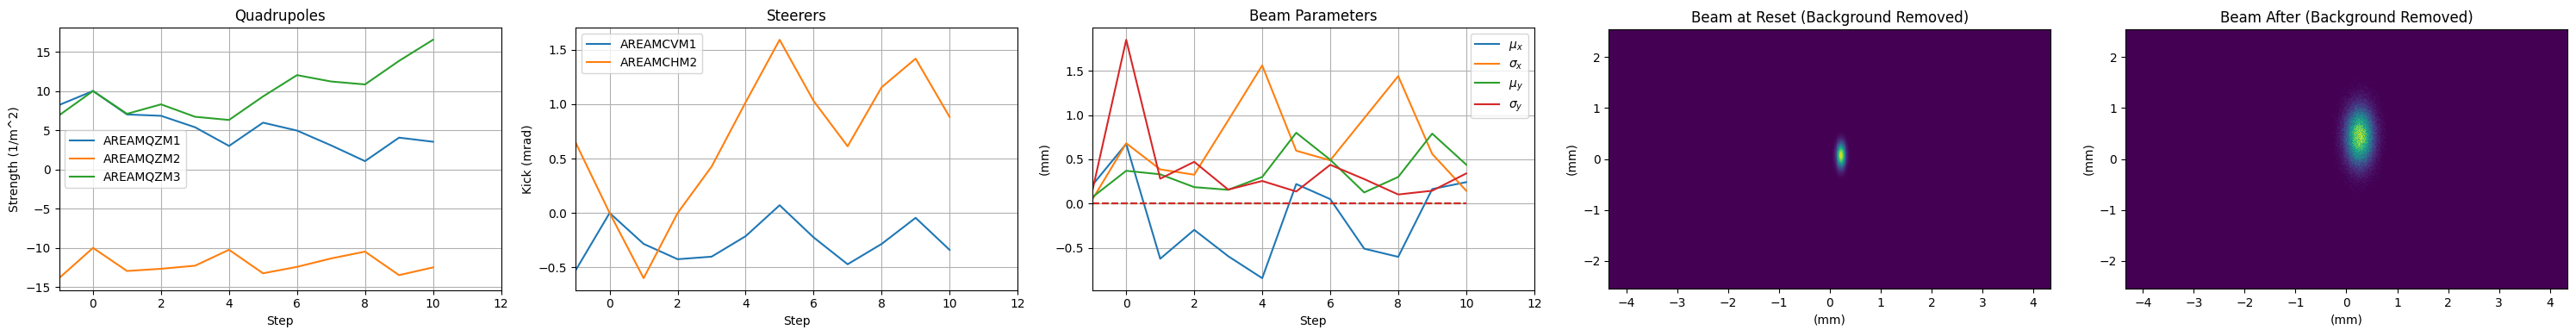

In [7]:
# Reinforcement Learning
from ea_optimize import optimize_donkey

optimize_donkey(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=10,
    model_name="polished-donkey-996",
    logbook=True,
    data_log_dir=f"kit_shift_data/rl/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
)
